In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import collections
import seaborn as sns
from math import *
from sklearn import cluster, datasets, mixture
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import knn as knn

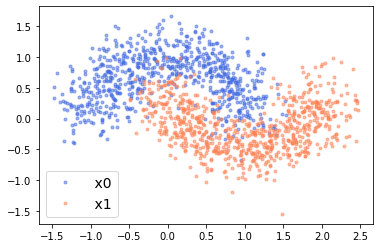

In [2]:
x, y = knn.generate_two_moon(1500, noise = 0.25)
knn.plot_result(x,y)
N_A = 10
N_test = 200
N=1500
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1-N_A/N, random_state=0,stratify = y) #0


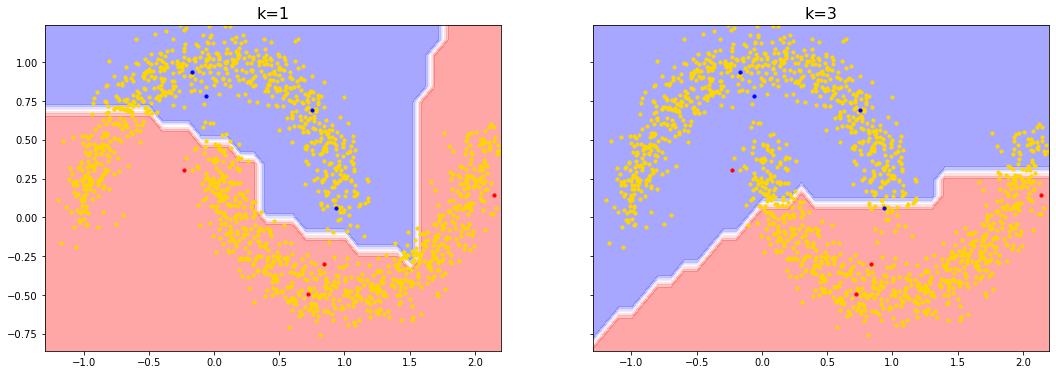

In [3]:
x_min, x_max = X_test[:, 0].min()-0.1, X_test[:, 0].max()+0.1
y_min, y_max = X_test[:, 1].min()-0.1, X_test[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
X_all=np.c_[xx.ravel(), yy.ravel()]
A1 = knn.find_best_label(knn.assign_unlabelled(X_train, y_train, X_all, 1))
# model A
AA1 = A1.reshape(xx.shape)   
# A2 = knn.find_best_label(knn.assign_unlabelled(X_train, y_train, X_all, 2))
# # model A
# AA2 = A2.reshape(xx.shape)
A3 = knn.find_best_label(knn.assign_unlabelled(X_train, y_train, X_all, 3))
# model A
AA3 = A3.reshape(xx.shape)
# A4 = knn.find_best_label(knn.assign_unlabelled(X_train, y_train, X_all, 4))
# # model A
# AA4 = A4.reshape(xx.shape)         
f, axarr = plt.subplots(1,2, sharex='col', sharey='row', figsize=(18, 6))
for idx, clf, tt in zip([0,1],[AA1,AA3],
                        ['k=1', 'k=3']):

    axarr[idx].contourf(xx, yy, clf, alpha=0.4, cmap = 'bwr')
    axarr[idx].scatter(X_test[:, 0], X_test[:, 1], color='gold', s=10)                                  
    axarr[idx].scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], c='blue',
                                  s=10)

    axarr[idx].scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], c='red',
                                  s=10)
    
    axarr[idx].set_title(tt, fontsize=16)
plt.show()

In [21]:
# global variable
N = 1500
d = 2
N_A = 10
N_test = 200
run = 1
x, y = knn.generate_two_moon(N, noise = 0.25)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=N_test/N)
perB=1-N_A/(N-N_test)
X_A, x, y_A, y = train_test_split(X_train, y_train, test_size=perB, random_state=42)

In [22]:
listA, listB, listMixed, listAcc = [], [], [], [] # for creating average chart

CPU times: user 500 ms, sys: 33.4 ms, total: 534 ms
Wall time: 530 ms


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 5), average across 1 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 5), average across 1 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

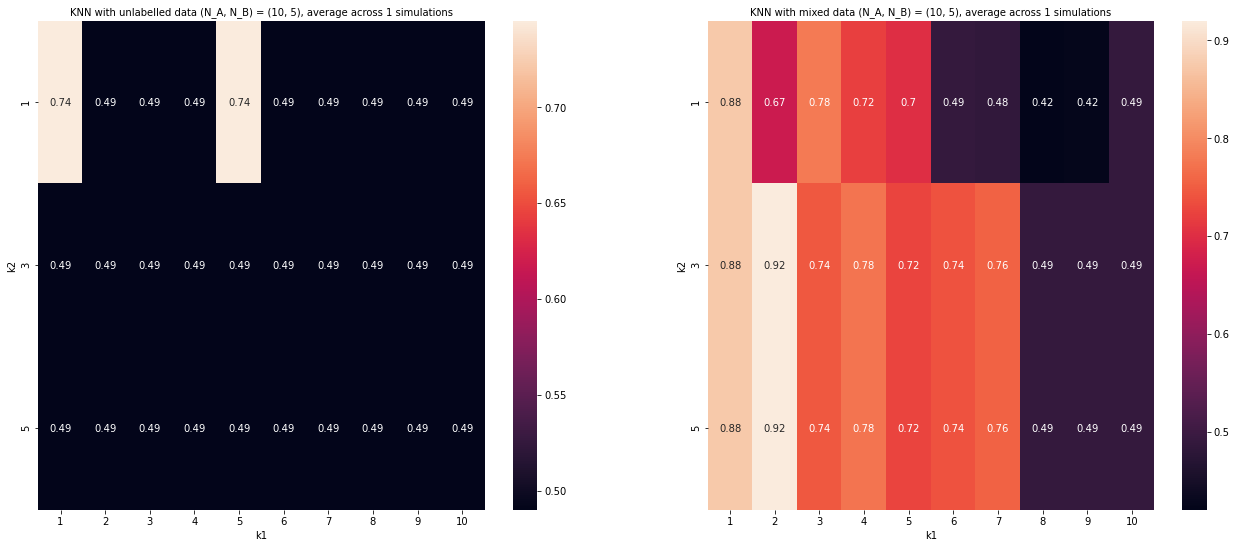

In [23]:
%%time
# listA[:run], listB[:run], listMixed[:run], listAcc[:run] = [], [], [], []
N_unlb = 5
k1_B, k2_B = [k+1 for k in range(0,20)], [k+1 for k in range(0,5,2)]
k1_AB, k2_AB = [k+1 for k in range(0,20)], [k+1 for k in range(0,5,2)] #k2 just take all 12 numbers
hmA, hmB_1, hmAB_1 = [], [], [] # for ploting average heatmap
best_A, best_B, best_mixed, acc_table, lb_pivot, unlb_pivot, mixed_pivot = knn.locate_max_accuracy(d, N_A, N_unlb, k1_B, k2_B, k1_AB, k2_AB, x, y, X_A, y_A, X_test, y_test, [])
listA.append(best_A)
listB.append(best_B)
listMixed.append(best_mixed)
listAcc.append(pd.DataFrame(acc_table))
hmA.append(lb_pivot)
hmB_1.append(unlb_pivot)
hmAB_1.append(mixed_pivot)
knn.plot_avr_heatmap(hmB_1, hmAB_1, N_A, N_unlb, run)

CPU times: user 938 ms, sys: 43.1 ms, total: 981 ms
Wall time: 991 ms


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 10), average across 1 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 10), average across 1 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

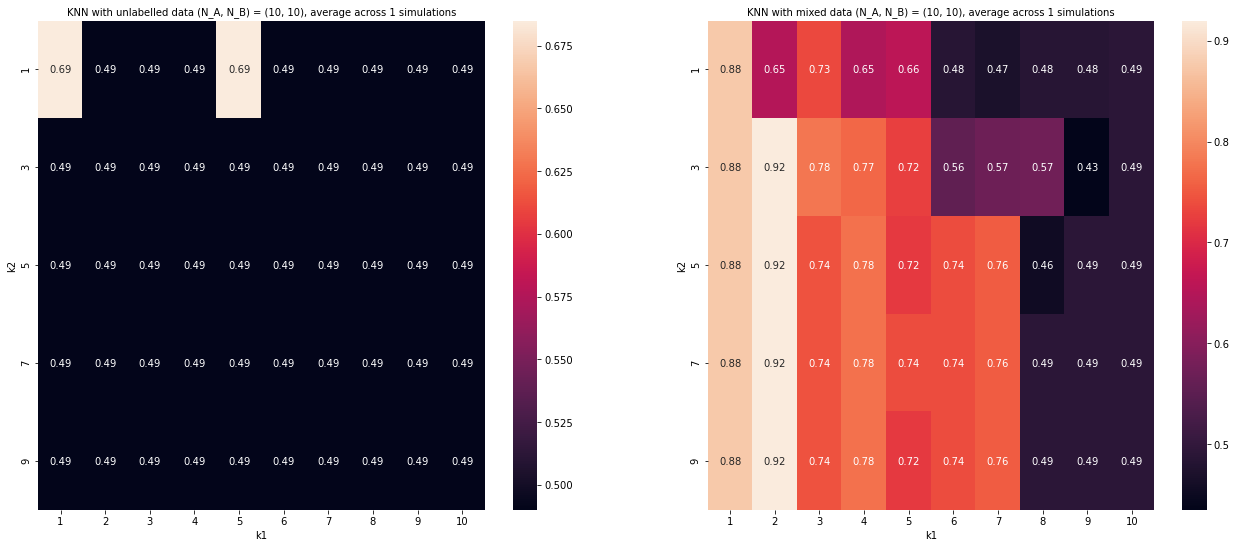

In [24]:
%%time
# listA[run:2*run], listB[run:2*run], listMixed[run:2*run], listAcc[run:2*run] = [], [], [], []
N_unlb = N_A
k1_B, k2_B = [k+1 for k in range(0,20)], [k+1 for k in range(0,20,2)]
k1_AB, k2_AB = [k+1 for k in range(0,20)], [k+1 for k in range(0,40,2)]
hmA_2, hmB_2, hmAB_2 = [], [], [] # for ploting average heatmap
best_A, best_B, best_mixed, acc_table, lb_pivot, unlb_pivot, mixed_pivot = knn.locate_max_accuracy(d, N_A, N_unlb, k1_B, k2_B, k1_AB, k2_AB, x, y, X_A, y_A, X_test, y_test, [])
listA.append(best_A)
listB.append(best_B)
listMixed.append(best_mixed)
listAcc.append(pd.DataFrame(acc_table))
hmA_2.append(lb_pivot)
hmB_2.append(unlb_pivot)
hmAB_2.append(mixed_pivot)
knn.plot_avr_heatmap(hmB_2, hmAB_2, N_A, N_unlb, run)

# knn.plot_avr_heatmap(hmB_2, hmAB_2, N_A, N_unlb, run)

CPU times: user 22.1 s, sys: 168 ms, total: 22.2 s
Wall time: 22.4 s


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 100), average across 1 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 100), average across 1 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

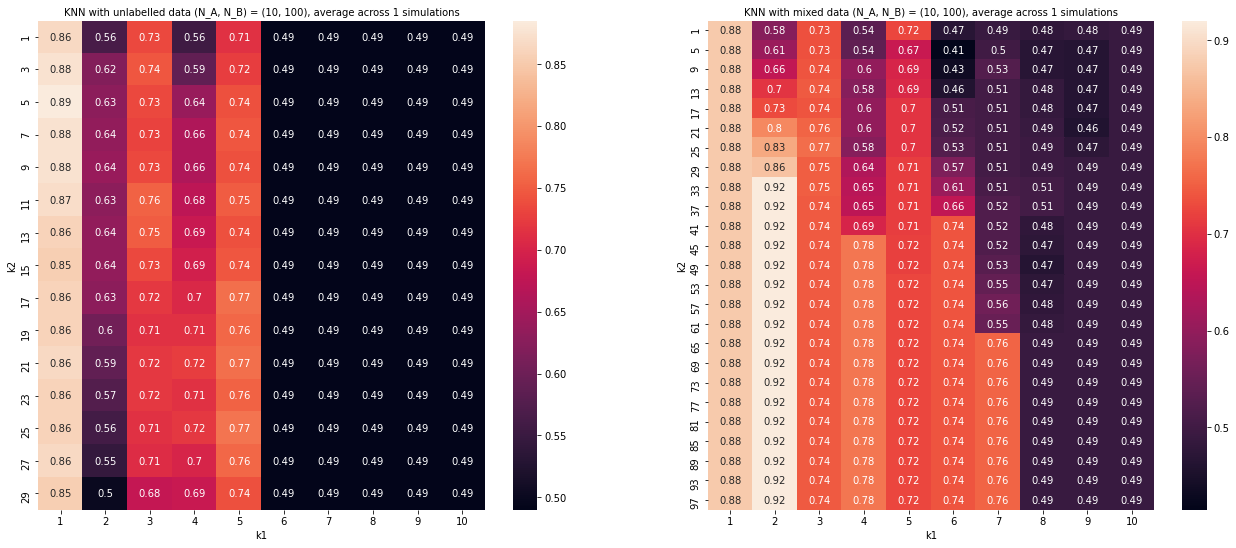

In [25]:
%%time
# listA[2*run:3*run], listB[2*run:3*run], listMixed[2*run:3*run], listAcc[2*run:3*run] = [], [], [], []
N_unlb = 100
k1_B, k2_B = [k+1 for k in range(0,20)], [k+1 for k in range(0,30,2)]
k1_AB, k2_AB = [k+1 for k in range(0,12)], [k+1 for k in range(0,101,4)]

hmA_3, hmB_3, hmAB_3 = [], [], [] # for ploting average heatmap
best_A, best_B, best_mixed, acc_table, lb_pivot, unlb_pivot, mixed_pivot = knn.locate_max_accuracy(d, N_A, N_unlb, k1_B, k2_B, k1_AB, k2_AB, x, y, X_A, y_A, X_test, y_test, [])
listA.append(best_A)
listB.append(best_B)
listMixed.append(best_mixed)
listAcc.append(pd.DataFrame(acc_table))
hmA_3.append(lb_pivot)
hmB_3.append(unlb_pivot)
hmAB_3.append(mixed_pivot)
knn.plot_avr_heatmap(hmB_3, hmAB_3, N_A, N_unlb, run)

CPU times: user 3min 18s, sys: 824 ms, total: 3min 19s
Wall time: 3min 20s


array([<AxesSubplot:title={'center':'KNN with unlabelled data (N_A, N_B) = (10, 500), average across 1 simulations'}, xlabel='k1', ylabel='k2'>,
       <AxesSubplot:title={'center':'KNN with mixed data (N_A, N_B) = (10, 500), average across 1 simulations'}, xlabel='k1', ylabel='k2'>],
      dtype=object)

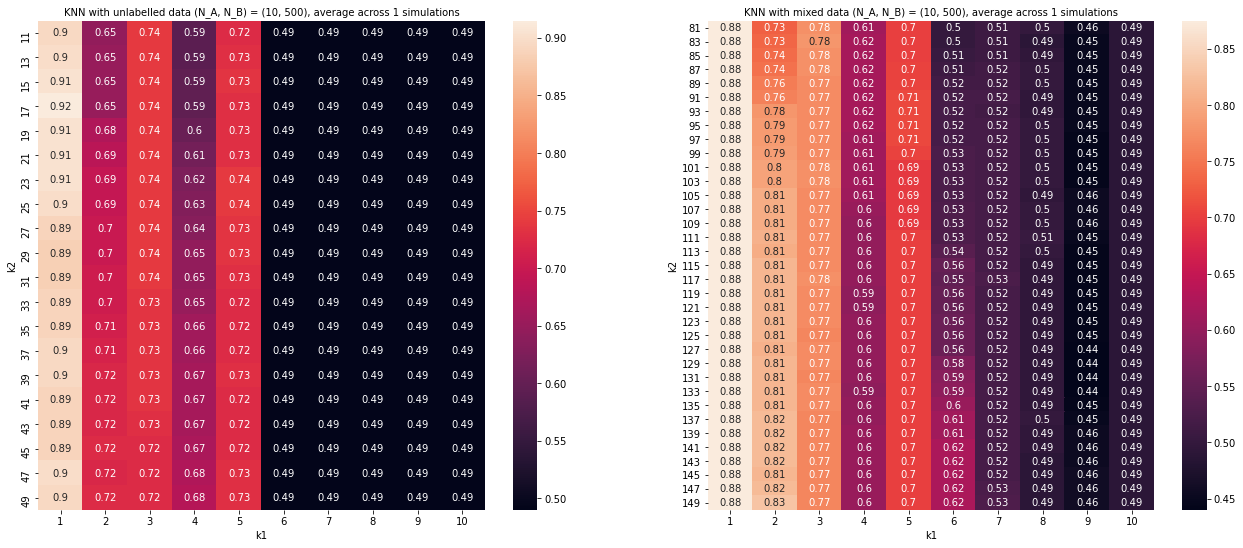

In [26]:
%%time
N_unlb = 500
k1_B, k2_B = [k+1 for k in range(0,20)], [k+1 for k in range(10,50,2)]
k1_AB, k2_AB = [k+1 for k in range(0,20)], [k+1 for k in range(80,150,2)]

hmA_4, hmB_4, hmAB_4 = [], [], [] # for ploting average heatmap
best_A, best_B, best_mixed, acc_table, lb_pivot, unlb_pivot, mixed_pivot = knn.locate_max_accuracy(d, N_A, N_unlb, k1_B, k2_B, k1_AB, k2_AB, x, y, X_A, y_A, X_test, y_test, [])
listA.append(best_A)
listB.append(best_B)
listMixed.append(best_mixed)
listAcc.append(pd.DataFrame(acc_table))
hmA_4.append(lb_pivot)
hmB_4.append(unlb_pivot)
hmAB_4.append(mixed_pivot)
knn.plot_avr_heatmap(hmB_4, hmAB_4, N_A, N_unlb, run)

In [27]:
listAcc

[   N_A  N_B      0     -1  lambda
 0   10    5  0.875  0.745    0.92,
    N_A  N_B      0     -1  lambda
 0   10   10  0.875  0.685    0.92,
    N_A  N_B      0     -1  lambda
 0   10  100  0.875  0.885    0.92,
    N_A  N_B      0     -1  lambda
 0   10  500  0.875  0.915   0.875]

In [10]:
print("average accuracy table, unlabelled size = 5: ")
df = knn.avr_best_score(hmB_1, hmAB_1, hmA)
display(df)
display(df.var())
print("average accuracy table, unlabelled size = 20: ")
df = knn.avr_best_score(hmB_2, hmAB_2, hmA_2)
display(df)
display(df.var())
print("average accuracy table, unlabelled size = 100: ")
df = knn.avr_best_score(hmB_3, hmAB_3, hmA_3)
display(df)
display(df.var())
print("average accuracy table, unlabelled size = 500: ")
df = knn.avr_best_score(hmB_4, hmAB_4, hmA_4)
display(df)
display(df.var())

average accuracy table, unlabelled size = 5: 


,k1,k2,accuracy
0,7,NaN,0.735
-1,4,1.0,0.740
mixed,2,1.0,0.815


k1          6.333333
k2          0.000000
accuracy    0.002008
dtype: float64

average accuracy table, unlabelled size = 20: 


,k1,k2,accuracy
0,7,NaN,0.735
-1,4,5.0,0.775
mixed,2,1.0,0.815


k1          6.333333
k2          8.000000
accuracy    0.001600
dtype: float64

average accuracy table, unlabelled size = 100: 


,k1,k2,accuracy
0,7,NaN,0.735
-1,2,3.0,0.795
mixed,2,37.0,0.815


k1            8.333333
k2          578.000000
accuracy      0.001733
dtype: float64

average accuracy table, unlabelled size = 500: 


,k1,k2,accuracy
0,7,NaN,0.735
-1,2,19.0,0.885
mixed,2,81.0,0.740


k1             8.333333
k2          1922.000000
accuracy       0.007258
dtype: float64

In [28]:
accuracy_summary = pd.concat(listAcc)
display(accuracy_summary.groupby(by="N_B").mean())
accuracy_summary.groupby(by="N_B").var()

,N_A,0,-1,lambda
N_B,,,,
5,10,0.875,0.745,0.920
10,10,0.875,0.685,0.920
100,10,0.875,0.885,0.920
500,10,0.875,0.915,0.875


,N_A,0,-1,lambda
N_B,,,,
5,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN


In [11]:
display(pd.concat(listA).groupby(by="N_B").mean())
display(pd.concat(listA).groupby(by="N_B").var())
display(pd.concat(listB).groupby(by="N_B").mean())
display(pd.concat(listB).groupby(by="N_B").var())
display(pd.concat(listMixed).groupby(by="N_B").mean())
display(pd.concat(listMixed).groupby(by="N_B").var())

,N_A,k1,accuracy
N_B,,,
5,20,1,0.905
20,20,1,0.905
500,20,1,0.905


,N_A,k1,accuracy
N_B,,,
5,NaN,NaN,NaN
20,NaN,NaN,NaN
500,NaN,NaN,NaN


,N_A,k1,k2,accuracy
N_B,,,,
5,20,10,1,0.715
20,20,4,3,0.915
500,20,2,17,0.930


,N_A,k1,k2,accuracy
N_B,,,,
5,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN


,N_A,k1,k2,lambda,accuracy
N_B,,,,,
5,20,1,1,0.250000,0.905
20,20,1,1,1.000000,0.905
500,20,4,143,0.699301,0.910


,N_A,k1,k2,lambda,accuracy
N_B,,,,,
5,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN


In [49]:
import knn as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
N_A = 10
N_B = 500
x, y = knn.generate_two_moon(1500, noise = 0.25)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=N_test/N, random_state=42) #42
perB=1-N_A/(N-N_test)
X_A, X_B, y_A, y_B = train_test_split(X_train, y_train, test_size=perB, random_state=21, stratify=y_train) #2, 42
X_B, y_B = X_B[:N_B], y_B[:N_B]


labelled data size:  20
unlabelled data size:  500
Model A accuracy:  0.88
Model B accuracy:  0.91
Model C accuracy:  0.92


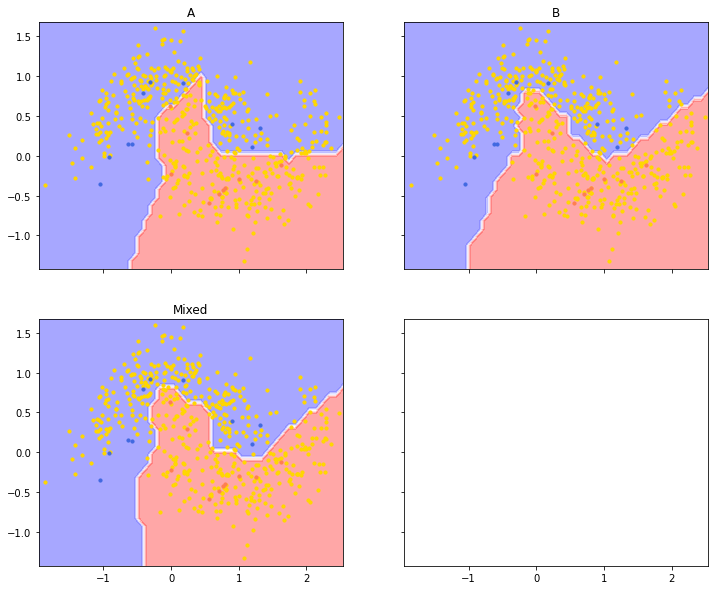

In [51]:
# Plotting decision regions
k1A, k1B, k2B, k1C, k2C=3,1,5,1,29
X, Y = np.concatenate((X_A,X_B), axis=0), np.concatenate((y_A,y_B), axis=0),
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
X_all=np.c_[xx.ravel(), yy.ravel()]

# model A
A = knn.find_best_label(knn.assign_unlabelled(X_A, y_A, X_all, k1A))
AA = A.reshape(xx.shape)

# model B
B = knn.knn_B(k1B, k2B, X_A, y_A, X_B, X_all)
BB = B.reshape(xx.shape)
 
# model C
coef = ((N_B*k1C)/(N_A*k2C))**(2/d)
C = knn.knn_C(coef, k1C, k2C, X_A, y_A, X_B, X_all)
CC = C.reshape(xx.shape)

print("labelled data size: ", N_A)
print("unlabelled data size: ", N_B)
print("Model A accuracy: ", accuracy_score(knn.find_best_label(knn.assign_unlabelled(X_A, y_A, X_test, k1A)), y_test))
print("Model B accuracy: ", accuracy_score(knn.knn_B(k1B, k2B, X_A, y_A, X_B, X_test), y_test))
print("Model C accuracy: ", accuracy_score(knn.knn_C(coef, k1C, k2C, X_A, y_A, X_B, X_test), y_test))
f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(12, 10))
for idx, clf, tt in zip([(0,0), (0,1), (1,0)],
                        [AA,BB,CC],
                        ['A', 'B',
                         'Mixed']):

    axarr[idx[0], idx[1]].contourf(xx, yy, clf, alpha=0.4, cmap = 'bwr')
    axarr[idx[0], idx[1]].scatter(X_B[:, 0], X_B[:, 1], color='gold', s=10)                                  
    axarr[idx[0], idx[1]].scatter(X_A[y_A==0][:, 0], X_A[y_A==0][:, 1], c='royalblue',
                                  s=10)

    axarr[idx[0], idx[1]].scatter(X_A[y_A==1][:, 0], X_A[y_A==1][:, 1], c='coral',
                                  s=10)
    
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()